# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [84]:
# Import numpy library
import numpy as np
np.random.seed(42) # For reproducibility
# Function to initialize network
def initialize_network(input_size, hidden_layers, output_size):
    # Previous layer nodes
    numNodesPrev = input_size
    # Number of hidden layers
    numHidden = len(hidden_layers)
    # Empty dictionary for network
    network = {}
    # Loop through layers and initialize weights and biases
    for layer in range (numHidden + 1):
        # Last layer in network
        if layer == numHidden:
            layerName = 'Output'
            numNodes = output_size
        # Other layers
        else:
            layerName = 'Layer_{}'.format(layer + 1)
            numNodes = hidden_layers[layer]
        # Initialize weights and biases for nodes
        network[layerName] = {}
        for node in range(numNodes):
            nodeName = 'Node_{}'.format(node + 1)
            network[layerName][nodeName] = {
                'Weights' : np.around(np.random.uniform(size = numNodesPrev), decimals = 2),
                'Bias' : np.around(np.random.uniform(size = 1), decimals = 2),
            }
        numNodesPrev = numNodes
    return network
    

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, [4, 3], 1)
print("<Ruby> + Initialized Network:", network)

<Ruby> + Initialized Network: {'Layer_1': {'Node_1': {'Weights': array([0.37, 0.95, 0.73]), 'Bias': array([0.6])}, 'Node_2': {'Weights': array([0.16, 0.16, 0.06]), 'Bias': array([0.87])}, 'Node_3': {'Weights': array([0.6 , 0.71, 0.02]), 'Bias': array([0.97])}, 'Node_4': {'Weights': array([0.83, 0.21, 0.18]), 'Bias': array([0.18])}}, 'Layer_2': {'Node_1': {'Weights': array([0.3 , 0.52, 0.43, 0.29]), 'Bias': array([0.61])}, 'Node_2': {'Weights': array([0.14, 0.29, 0.37, 0.46]), 'Bias': array([0.79])}, 'Node_3': {'Weights': array([0.2 , 0.51, 0.59, 0.05]), 'Bias': array([0.61])}}, 'Output': {'Node_1': {'Weights': array([0.17, 0.07, 0.95]), 'Bias': array([0.97])}}}


## Step 2: Compute Weighted Sum

In [86]:
# Function to compute the weighted sums
def compute_weighted_sum(inputs, weights, biases):
    return np.sum(inputs * weights) + biases

# Test weighted sum
inputs = np.array([[0.5, 0.2, 0.1]])
layer = network['Layer_1']  # First layer
Z1 = compute_weighted_sum(inputs, layer['Node_1']['Weights'], layer['Node_1']['Bias'])
Z2 = compute_weighted_sum(inputs, layer['Node_2']['Weights'], layer['Node_2']['Bias'])
Z3 = compute_weighted_sum(inputs, layer['Node_3']['Weights'], layer['Node_3']['Bias'])
Z4 = compute_weighted_sum(inputs, layer['Node_4']['Weights'], layer['Node_3']['Bias'])
print("<Ruby> + Weighted Sum:", Z1, Z2, Z3, Z4)

<Ruby> + Weighted Sum: [1.048] [0.988] [1.414] [1.445]


## Step 3: Compute Node Activation

In [88]:
# Sigmoid function as activation function
def sigmoid(Z):
    return 1.0 / (1.0 + np.exp(-1 * Z))
# Sigmoid derivative function
def sigmoid_derivative(A):
    return A * (1 - A)

# Compute activation for the weighted sum
A = sigmoid(Z1), sigmoid(Z2), sigmoid(Z3), sigmoid(Z4)
print("<Ruby> + Activation:", A)

<Ruby> + Activation: (array([0.74039066]), array([0.7286927]), array([0.80439608]), array([0.80922774]))


## Step 4: Perform Forward Propagation

In [90]:
# Forward propogation function
def forward_propagation(inputs, network):
    # Input layer
    layerIn = list(inputs)
    # Loop through layers
    for layer in network:
        layerData = network[layer]
        layerOut = [] 
        for layerNode in layerData:
            nodeData = layerData[layerNode]
            # Compute weighted sum and outputs
            nodeOutput = sigmoid(compute_weighted_sum(layerIn, nodeData['Weights'], nodeData['Bias']))
            layerOut.append(np.around(nodeOutput, decimals = 4))
        if layer != 'Output':
            print('Outputs of nodes in hidden layer number {} is {}'.format(layer.split('_')[1], layerOut))
        layerIn = layerOut
    networkPredict = layerOut
    return networkPredict

# Perform forward propagation
activations = forward_propagation(inputs, network)
print(activations)
print("<Ruby> + Final Output:{}".format(np.around(activations, decimals = 4)))

Outputs of nodes in hidden layer number 1 is [array([0.7404]), array([0.7287]), array([0.8044]), array([0.6581])]
Outputs of nodes in hidden layer number 2 is [array([0.9941]), array([0.9888]), array([0.9897])]
[array([0.9891])]
<Ruby> + Final Output:[[0.9891]]


## Step 5: Backpropagation

In [92]:
# Backpropogation function
def backpropagation(network, activations, y_true):
    # Compute output layer deltas
    deltaOut = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])
    # Loop through layers in reverse
    for layerRev in reversed(range(len(network))):
        # Current layer name and data
        layerName = list(network.keys())[layerRev]
        currLayer = network[layerName]
        # Output layer
        if layerName == 'Output':
            delta = deltaOut
        # Hidden layers
        else:
            nextLayerName = list(network.keys())[layerRev + 1]
            nextLayer = network[nextLayerName]
            weightMatrix = np.array([node['Weights'] for node in nextLayer.values()])
            delta = np.dot(delta, weightMatrix.T) * sigmoid_derivative(activations[layerRev + 1])
    return network
# Compute gradients
y_true = np.array([[1]])  # Example target output
gradients = backpropagation(network, activations, y_true)
print("<Ruby> + Gradients:", gradients)

ValueError: shapes (1,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

## Step 6: Update Weights

In [6]:
def update_weights(network, gradients, learning_rate):
    # Hints: weights -= learning_rate * 'dW'
    # Hints: biases -= learning_rate * 'db'
    # Provide your code
    

# Update weights with a learning rate of 0.1
update_weights(network, gradients, learning_rate=0.1)
print("<Ruby> + Updated Network:", network)

Updated Network: [{'weights': array([[ 0.04967806, -0.0138271 ,  0.06476341,  0.15231013],
       [-0.02341268, -0.02341397,  0.1579191 ,  0.07674633],
       [-0.04694611,  0.05425587, -0.04634286, -0.04657155]]), 'biases': array([[ 1.32969732e-05, -1.34967278e-06, -1.08942558e-05,
         1.42945225e-05]])}, {'weights': array([[ 0.02410747, -0.19131013, -0.17267946],
       [-0.05631655, -0.1012654 ,  0.03123907],
       [-0.09089309, -0.14121208,  0.14637311],
       [-0.02266952,  0.00677135, -0.14266914]]), 'biases': array([[-1.76144443e-04,  3.55243016e-05, -3.72480905e-04]])}, {'weights': array([[-0.04819881],
       [ 0.01687515],
       [-0.10884617]]), 'biases': array([[0.01296059]])}]


## Step 7: Visualizing Loss Changes

In [7]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    # provide your code
    return np.mean((y_true - y_pred) ** 2)

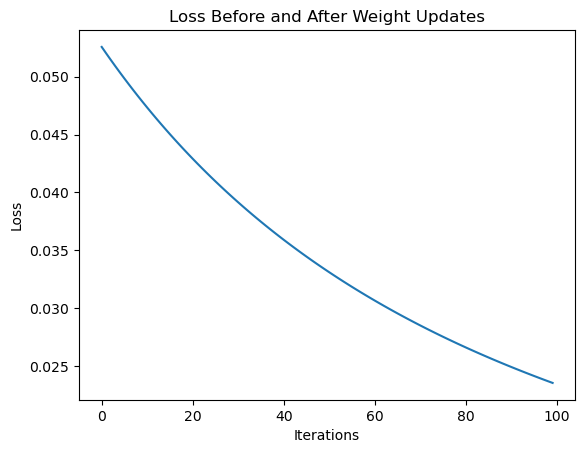

In [10]:
import matplotlib.pyplot as plt

# Training Loop
losses = []
inputs = np.array([[0.5, 0.2, 0.1]])
y_true = np.array([[1]])
learning_rate = 0.1

for iteration in range(100):
    # provide your code
    # Hints: forward_propagation function with inputs network
    #        compute_loss for y_true and activations[-1]
    #        add loss to losses
     

    # gradients = backpropagation function
    # update_weights
    activations = forward_propogation(inputs, network)
    loss = compute_loss(y_true, activations[-1])
    losses.append(loss)
    network = back_propogation(network, activations, y_true)
    
    
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("<Ruby> + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


### Step 8: Visualizing Gradients Changes (Graduate students)

Please pick a weight and plot the gradient change

You need to point which weight you pick and label it on your graph.

In [ ]:
# Your code